## **Выпускные квалификационные работы студентов НИУ ВШЭ** ##

Программа предназначена для сбора и анализа информации по выпускным квалификационным работам ВШЭ магистерской программы ВШБ "Бизнес-информатика".

###*1. Подключим необходимые библиотеки*

In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np

###*2. Определим константы*

`URL` —  [ссылка](https://www.hse.ru/edu/vkr/) на ВКР студентов НИУ ВШЭ с примененными фильтрами:
- факультет: Высшая Школа Бизнеса;
- уровень образования: магистратура;
- программа: Бизнес-информатика.

`CNT_PAGE` — захардкоженное число страниц результата поиска по `URL`.

In [4]:
URL = r'https://www.hse.ru/edu/vkr/?faculty=143571564&program=g122392179%3Bp135181726%3Bp135181468%3Bp135181722%3Bp377879003%3Bg122468449%3Bp377879230%3Bp135181724%3Bg122468450%3Bg52587428%3Bg52587427%3Bp135181460&level=2&page='
CNT_PAGE = 63

###*3. Функция парсинга данных*

функция `parse_data` парсит с сайта `URL` данные, размещенные на `CNT_PAGE` и формирует DataFrame, который содержит 4 столбца:
- `name_proj` — название ВКР студента;
- `year` — год защиты ВКР;
- `name_teacher` — ФИО научного руководителя;
- `score` — оценка работы на защите.

In [244]:
def parse_data(URL, CNT_PAGE):
  names_works = []
  names_teachers = []
  years_works = []
  scores_students = []

  for i in range(CNT_PAGE):
    response = requests.get(URL+str(i+1))
    html = bs(response.content, 'html.parser')

    for el in html.select(".vkr-list > .vkr-card"):
      title = el.select('.vkr-card__title > a')
      names_works.append(" ".join((title[0].text).split()))
      title = el.select('.vkr-card__item > span')
      names_teachers.append(title[2].text)
      if int(title[3].text) > 10:
        scores_students.append(np.nan)
        years_works.append(int(title[3].text))
      else:
        scores_students.append(int(title[3].text))
        years_works.append(int(title[4].text))
  df = pd.DataFrame({'score': scores_students, 'name_teacher': names_teachers, 'year': years_works, 'name_proj': names_works} )
  df.to_csv('vkr_hse.csv', encoding='utf-8', index=False)
  return 'vkr_hse.csv', df

In [246]:
project_name, df = parse_data(URL, CNT_PAGE)

###*4. Создание DataFrame*

Если файл `vkr_hse.csv` уже у вас сформирован, то нет смысла вызывать повторный парсинг и можно просто открыть его с помощью библиотеки `pandas`.

In [191]:
df = pd.read_csv('vkr_hse.csv')

###*5. Исследуем полученные данные*

####5.1. Выведим основную информацию

Для этого воспользуемся функциями `head()`, `info()`, `value_counts()`.

In [41]:
df.head()

,score,name_teacher,year,name_proj
0,NaN,Акопов Андраник Сумбатович,2022,Разработка имитационной модели для производств...
1,NaN,Ямпольский Сергей Михайлович,2022,Повышение эффективности управления персоналом ...
2,NaN,Акопов Андраник Сумбатович,2022,Разработка имитационной модели производственно...
3,NaN,Филатов Николай Александрович,2022,Cоздание чат-ботов и разработка прототипа чат-...
4,7.0,Богданова Татьяна Кирилловна,2022,Прогноз потребления электроэнергии в разрезе р...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   score         114 non-null    float64
 1   name_teacher  629 non-null    object 
 2   year          629 non-null    int64  
 3   name_proj     629 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.8+ KB


In [43]:
df['score'].value_counts()

8.0     47
9.0     30
7.0     21
10.0    16
Name: score, dtype: int64

In [44]:
df['name_teacher'].value_counts()

Богданова Татьяна Кирилловна        46
Якушкина Татьяна Сергеевна          34
Сидоренко Валентина Геннадьевна     34
Бекларян Армен Левонович            32
Исаев Дмитрий Валентинович          28
                                    ..
Лычкина Наталья Николаевна           1
Текич Желько                         1
Смирнов Денис Сергеевич              1
Филатов Николай Александрович        1
Герасимов Николай Александрович      1
Name: name_teacher, Length: 76, dtype: int64

In [45]:
df['year'].value_counts()

2015    92
2019    88
2020    80
2021    79
2018    76
2017    75
2022    72
2016    67
Name: year, dtype: int64

####5.2. Посмотрим гистограммы

Взгляним на распределения значений с помощью функций библиотекци `matplotlib`.

Подключим все необходимые библиотеки лдя визуализации.


In [247]:
import matplotlib.pyplot as plt

Построим гистограмму количества ВКР за каждый год.

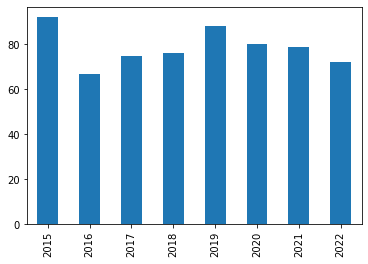

In [40]:
df['year'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.show()

Построим гистограмму количества полученный оценок.

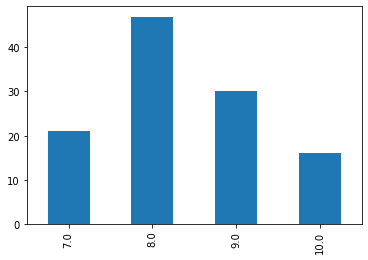

In [46]:
df['score'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.show()

Построим гистограмму оценок за 2022 год.

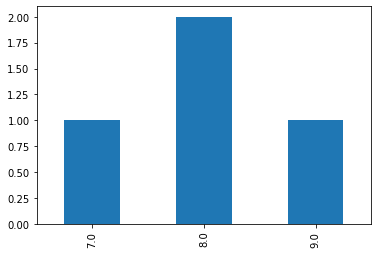

In [50]:
df_2022 = df[df['year']==2022]
df_2022['score'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.show()

Что-то малова-то оценок выставили. А малова-то — это сколько?

In [55]:
df_2022.count()

score            4
name_teacher    72
year            72
name_proj       72
dtype: int64

А какой процент работ ежегодно получаются оценки? Посчитаем количество выставленных проектам оцененных по годам и оценим долю.


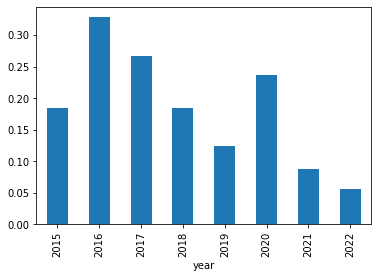

In [62]:
proportion = df.groupby('year')['score'].count() / df.groupby('year')['name_proj'].count()
proportion.sort_index(ascending=True).plot(kind='bar')
plt.show()

Из график выше можно сделать вывод, что последние два года (по какой-то неизвестной причине) оценки за ВКР выставлялись публично на сайте лишь ~10% выпускников.

####5.3. Анализ преподавателей####

Что же это за преподаватели, которые подготовили студентов в прошлом году со столь отличными работами?

In [75]:
df_2022[df_2022['score'] > 0].loc[:, ['name_teacher', 'score']]

,name_teacher,score
4,Богданова Татьяна Кирилловна,7.0
7,Бекларян Армен Левонович,8.0
62,Бекларян Армен Левонович,8.0
69,Богданова Татьяна Кирилловна,9.0


А в 2021 и 2020?

In [77]:
df_2021 = df[df['year']==2021]
df_2021[df_2021['score'] > 0].loc[:, ['name_teacher', 'score']]

,name_teacher,score
81,Брускин Сергей Наумович,10.0
82,Дорофеев Алексей Николаевич,7.0
96,Исаев Дмитрий Валентинович,7.0
103,Исаев Дмитрий Валентинович,7.0
109,Богданова Татьяна Кирилловна,8.0
118,Богданова Татьяна Кирилловна,7.0
139,Брускин Сергей Наумович,9.0


In [127]:
df_2020 = df[df['year']==2020]
tmp_df = df_2020[df_2020['score'] > 0].loc[:, ['name_teacher', 'score']]
tmp_df.sort_values(by=['score'], ascending=False)

,name_teacher,score
155,Романов Дмитрий Александрович,10.0
161,Кравченко Татьяна Константиновна,10.0
163,Моргунов Александр Федорович,10.0
221,Брускин Сергей Наумович,10.0
204,Попов Виктор Юрьевич,10.0
151,Кузнецова Елена Владимировна,9.0
211,Сидоренко Валентина Геннадьевна,9.0
185,Акопов Андраник Сумбатович,9.0
181,Зеленков Юрий Александрович,9.0
178,Сидоренко Валентина Геннадьевна,9.0


2020 год богат на оценки. Сперва сгруппируем работы, которые курировались каждым преподавателем, по средним оценкам работы.

In [128]:
tmp_df = tmp_df.groupby("name_teacher").agg({'score':['mean', 'count']}).reset_index()
tmp_df.sort_values(by=('score', 'mean'), ascending=False)

name_teacher      score      
                                           mean count
6      Моргунов Александр Федорович   10.000000     1
7              Попов Виктор Юрьевич   10.000000     1
0        Акопов Андраник Сумбатович    9.000000     2
5      Кузнецова Елена Владимировна    9.000000     1
8     Романов Дмитрий Александрович    9.000000     3
9   Сидоренко Валентина Геннадьевна    9.000000     2
2       Зеленков Юрий Александрович    8.666667     3
1           Брускин Сергей Наумович    8.500000     2
4  Кравченко Татьяна Константиновна    8.333333     3
3         Исаев Евгений Анатольевич    8.000000     1

Но таблица выше не является показательной, поскольку необходимо брать в учет как оценку, так и количетсов работ у преподавателя. 

Для этого рассчитаем критерий Гурвица, где коэффициент оптимизма `alpha = 0.5`. Выведем таблицу, в порядке минимизации критери.

In [129]:
alpha = 0.5
hurwitz_crit = tmp_df['score']['mean'] * alpha + tmp_df['score']['count'] * alpha
tmp_df['hurwitz_crit'] = hurwitz_crit
tmp_df.sort_values(by=['hurwitz_crit'], ascending=False)

name_teacher      score       hurwitz_crit
                                           mean count             
8     Романов Дмитрий Александрович    9.000000     3     6.000000
2       Зеленков Юрий Александрович    8.666667     3     5.833333
4  Кравченко Татьяна Константиновна    8.333333     3     5.666667
0        Акопов Андраник Сумбатович    9.000000     2     5.500000
6      Моргунов Александр Федорович   10.000000     1     5.500000
7              Попов Виктор Юрьевич   10.000000     1     5.500000
9   Сидоренко Валентина Геннадьевна    9.000000     2     5.500000
1           Брускин Сергей Наумович    8.500000     2     5.250000
5      Кузнецова Елена Владимировна    9.000000     1     5.000000
3         Исаев Евгений Анатольевич    8.000000     1     4.500000

####5.4. Обобщим анализ преподавателей на всю выборку####

Рассчитаем критерий Гурвича на всей выборке.

In [187]:
df_analyze = df[df['score'] > 0].loc[:, ['name_teacher', 'score']]
df_analyze = df_analyze.groupby("name_teacher").agg({'score':['mean', 'count']}).reset_index()
alpha = 0.5
hurwitz_crit = df_analyze['score']['mean'] * alpha + df_analyze['score']['count'] * alpha
df_analyze['hurwitz_crit'] = hurwitz_crit
df_analyze.columns = ['name_teacher', 'score_mean', 'score_count', 'hurwitz_crit']
df_analyze.sort_values(by=['hurwitz_crit'], ascending=False).reset_index()

,index,name_teacher,score_mean,score_count,hurwitz_crit
0,25,Сидоренко Валентина Геннадьевна,8.636364,11,9.818182
1,5,Богданова Татьяна Кирилловна,8.454545,11,9.727273
2,24,Романов Дмитрий Александрович,9.000000,9,9.000000
3,8,Грекул Владимир Иванович,8.285714,7,7.642857
4,18,Кравченко Татьяна Константиновна,8.333333,6,7.166667
5,30,Хачатрян Нерсес Карленович,7.833333,6,6.916667
6,17,Коровкина Нина Леонидовна,8.200000,5,6.600000
7,6,Брускин Сергей Наумович,9.000000,4,6.500000
8,21,Моргунов Александр Федорович,9.666667,3,6.333333
9,15,Казанцев Николай Сергеевич,8.500000,4,6.250000


In [188]:
df_count_student_by_teach = df.groupby(df['name_teacher'].tolist(), as_index=False).size()
df_count_student_by_teach.columns = ['name_teacher', 'total_count']

In [203]:
total_df = pd.merge(df_analyze, df_count_student_by_teach)
total_df.sort_values(by=['hurwitz_crit'], ascending=False)

,name_teacher,score_mean,score_count,hurwitz_crit,total_count
25,Сидоренко Валентина Геннадьевна,8.636364,11,9.818182,34
5,Богданова Татьяна Кирилловна,8.454545,11,9.727273,46
24,Романов Дмитрий Александрович,9.000000,9,9.000000,25
8,Грекул Владимир Иванович,8.285714,7,7.642857,25
18,Кравченко Татьяна Константиновна,8.333333,6,7.166667,17
30,Хачатрян Нерсес Карленович,7.833333,6,6.916667,10
17,Коровкина Нина Леонидовна,8.200000,5,6.600000,21
6,Брускин Сергей Наумович,9.000000,4,6.500000,18
21,Моргунов Александр Федорович,9.666667,3,6.333333,28
15,Казанцев Николай Сергеевич,8.500000,4,6.250000,15


####5.5 Добавим еще несколько параметров####

Добавим новый столбец: долю оцененных работ студентов каждого преподавателя.

In [204]:
total_df['proportion'] = total_df['score_count'] / total_df['total_count']

А еще дисперсию оценок работ студентов преподавателей.

In [243]:
set(df['name_teacher'])
variance = dict()
for name in set(df['name_teacher']):
  tmpp = df[df['name_teacher']==name]
  variance[name] = tmpp[tmpp['score']>0]['score'].var()
  if np.isnan(variance[name]):
    variance[name] = 0
df1 = pd.DataFrame(data=variance.items(), columns=['name_teacher', 'var']) 
total_df = pd.merge(total_df, df1)

In [254]:
total_df = total_df.sort_values(by=['hurwitz_crit'], ascending=False)
total_df

,name_teacher,score_mean,score_count,hurwitz_crit,total_count,proportion,var
19,Сидоренко Валентина Геннадьевна,8.636364,11,9.818182,34,0.323529,1.054545
4,Богданова Татьяна Кирилловна,8.454545,11,9.727273,46,0.239130,1.272727
18,Романов Дмитрий Александрович,9.000000,9,9.000000,25,0.360000,1.250000
7,Грекул Владимир Иванович,8.285714,7,7.642857,25,0.280000,1.238095
15,Кравченко Татьяна Константиновна,8.333333,6,7.166667,17,0.352941,1.066667
21,Хачатрян Нерсес Карленович,7.833333,6,6.916667,10,0.600000,0.166667
14,Коровкина Нина Леонидовна,8.200000,5,6.600000,21,0.238095,0.700000
5,Брускин Сергей Наумович,9.000000,4,6.500000,18,0.222222,2.000000
17,Моргунов Александр Федорович,9.666667,3,6.333333,28,0.107143,0.333333
12,Казанцев Николай Сергеевич,8.500000,4,6.250000,15,0.266667,1.000000


###*6. Визуализируем результат*###

Посмотрим на различные гистограммы. Подключим библиотеку `seaborn`.

In [249]:
import seaborn as sns

In [261]:
total_df.head(10)

,name_teacher,score_mean,score_count,hurwitz_crit,total_count,proportion,var
19,Сидоренко Валентина Геннадьевна,8.636364,11,9.818182,34,0.323529,1.054545
4,Богданова Татьяна Кирилловна,8.454545,11,9.727273,46,0.239130,1.272727
18,Романов Дмитрий Александрович,9.000000,9,9.000000,25,0.360000,1.250000
7,Грекул Владимир Иванович,8.285714,7,7.642857,25,0.280000,1.238095
15,Кравченко Татьяна Константиновна,8.333333,6,7.166667,17,0.352941,1.066667
21,Хачатрян Нерсес Карленович,7.833333,6,6.916667,10,0.600000,0.166667
14,Коровкина Нина Леонидовна,8.200000,5,6.600000,21,0.238095,0.700000
5,Брускин Сергей Наумович,9.000000,4,6.500000,18,0.222222,2.000000
17,Моргунов Александр Федорович,9.666667,3,6.333333,28,0.107143,0.333333
12,Казанцев Николай Сергеевич,8.500000,4,6.250000,15,0.266667,1.000000


Гистограмма средний оценки, состоящая из подвыборки оценок подопечных преподавателя.

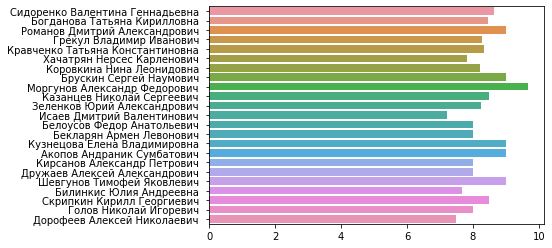

In [255]:
sns.barplot(y=list(total_df['name_teacher']), x=list(total_df['score_mean']))

Количество учеников у подопечного, которым выставили оценки в открытый доступ.

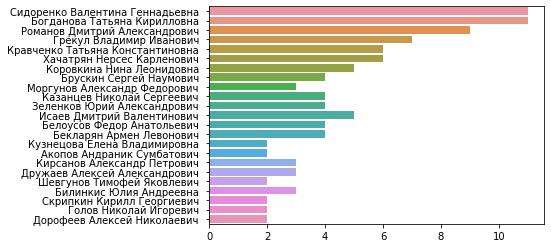

In [256]:
sns.barplot(y=list(total_df['name_teacher']), x=list(total_df['score_count']))

График кретирия Гурвица, как средневзвешенное количества поставленных оценок и среднего поставленных оценок.

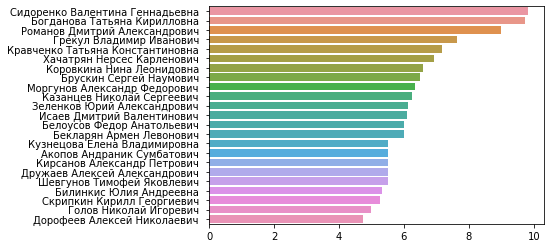

In [257]:
sns.barplot(y=list(total_df['name_teacher']), x=list(total_df['hurwitz_crit']))

Гистограмма количества дипломников у каждого начуника за минувшие 8 лет.

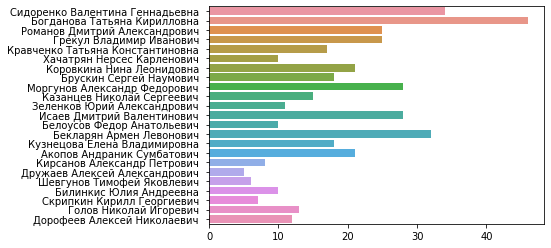

In [258]:
sns.barplot(y=list(total_df['name_teacher']), x=list(total_df['total_count']))

Гистограмма разброса оценок дипломников преподавателя - дисперсия.

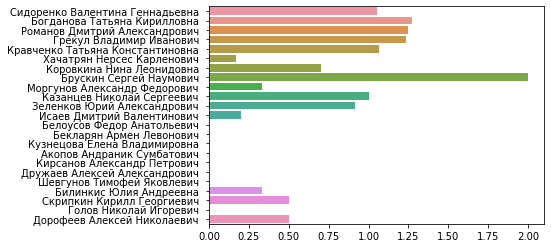

In [259]:
sns.barplot(y=list(total_df['name_teacher']), x=list(total_df['var']))

###*7. Темы работ студентов потенциальных научников*###

In [262]:
intesting_teachs = ['Моргунов Александр Федорович ', 'Кравченко Татьяна Константиновна ', 'Романов Дмитрий Александрович ', 'Сидоренко Валентина Геннадьевна ']

In [267]:
for teach in intesting_teachs:
  print('Имя преподавателя:', teach)
  list_projs = list(df[df['name_teacher'] == teach]['name_proj'])
  print(list_projs)
  with open('results.txt', 'a') as ouf:
    ouf.write(teach + '\n')
    for proj in list_projs:
        ouf.write(proj + '\n')
    ouf.write('\n')

Имя преподавателя: Моргунов Александр Федорович 
['Разработка методики автоматизации процессов управления персоналом на предприятиях крупного ритейла', 'Разработка методики переноса ИС собственной разработки с устаревшей на новую платформу', 'Разработка методики внедрения CRM-функционала в экосистему финансовой организации', 'Разработка методики замены информационной системы в финансовых подразделениях организации', 'Разработка методики миграции данных из существующих CRM-систем в Oracle Siebel CRM', 'Разработка методики внедрения ALM-системы в финансовой организации', 'Консолидация финансовой отчетности компаний, имеющих холдинговую структуру, на платформе Business Central', 'Разработка методики миграции данных из информационной системы на платформе 1С:Предприятие в ERP систему компании SAP', 'Совершенствование стандартных методов автоматизации бизнес-процессов финансового блока информационных систем с применением технологии RPA', 'Разработка методики внедрения программных роботов', '

###*8. Итог*###

Выбирайте научника, который находится в доверительном интервале, не сильно загружен и темы работ его подопечных находят отклик в Вашем сердце. Всем добра и зефирок!